In [1]:
%load_ext autoreload
%autoreload 2

import hw1
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [22]:
#Problem 1
crime = hw1.download_17_18_alt()
crime = crime.set_index('Date')

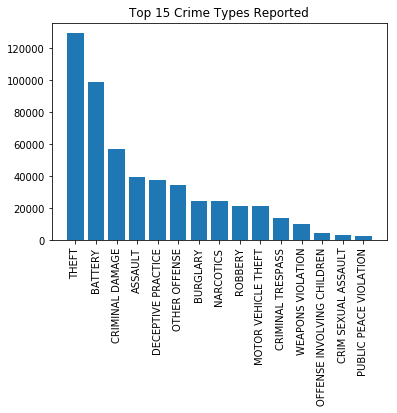

In [3]:
type_reported = crime.groupby('Primary Type').size().sort_values(ascending=False)[:15]
plt.bar(type_reported.index, type_reported.values)
plt.xticks(rotation=90)
plt.title('Top 15 Crime Types Reported')
plt.show()

/home/erhla/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


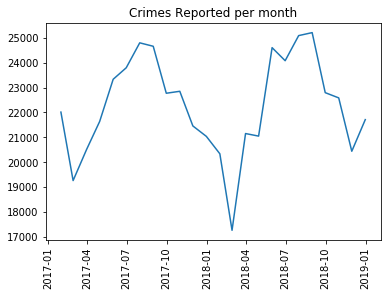

In [4]:
date_grouped = crime.groupby(pd.Grouper(freq='M')).size()
plt.plot(date_grouped)
plt.title('Crimes Reported per month')
plt.xticks(rotation=90)
plt.show()

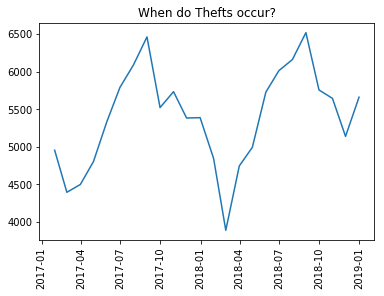

In [5]:
theft_df = crime[crime['Primary Type'] == 'THEFT']
date_grouped = theft_df.groupby(pd.Grouper(freq='M')).size()
plt.plot(date_grouped)
plt.title('When do Thefts occur?')
plt.xticks(rotation=90)
plt.show()

In [6]:
by_neighborhood = crime.groupby('Community Area')['Primary Type'].value_counts().unstack().idxmax(axis=1)

#Violent Crime is most common
numpy.where(numpy.isin(by_neighborhood, 'BATTERY'))[0]

array([17, 18, 19, 20, 23, 25, 26, 27, 29, 30, 38, 40, 42, 43, 45, 46, 47,
       48, 49, 52, 53, 54, 55, 58, 61, 63, 66, 67, 68, 69, 71])

In [7]:
#Property Crime is most common
numpy.where(numpy.isin(by_neighborhood, 'THEFT'))[0]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 21,
       22, 24, 28, 31, 32, 33, 34, 35, 36, 37, 39, 41, 44, 50, 51, 56, 57,
       59, 60, 62, 64, 65, 70, 72, 73, 74, 75, 76, 77])

The previous two cells make a simple demarkation between Chicago's neighborhoods. For some, Battery (a violent crime) is most common and for others Theft (a property crime) is most common.

In [ ]:
#Problem 2
#census = hw1.get_census_data()
coded = hw1.geomerge(crime)
coded.groupby(['tractce10', 'Primary Type']).size()
census = hw1.get_census_data()

coded.gr

#census_merged = pd.merge(df, census, how='left', left_on='tractce10', right_on='tract')




/home/erhla/machine-learning/hw1.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  crime_data['Location'] = crime_data['Location'].str.strip('()').str.split(',')
/home/erhla/machine-learning/hw1.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  crime_data['Location'] = crime_data['Location'].apply(lambda x: (float(x[1]), float(x[0])))


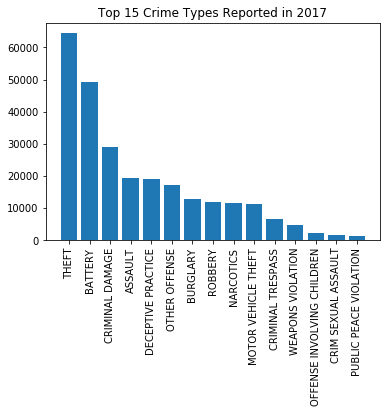

In [9]:
#Problem 3
crime_17 = crime.loc['2017-01-01':'2017-12-31']
crime_18 = crime.loc['2018-01-01':'2018-12-31']

sorted_17 = crime_17.groupby('Primary Type').size().sort_values(ascending=False)[:15]
plt.bar(sorted_17.index, sorted_17.values)
plt.xticks(rotation=90)
plt.title('Top 15 Crime Types Reported in 2017')
plt.show()

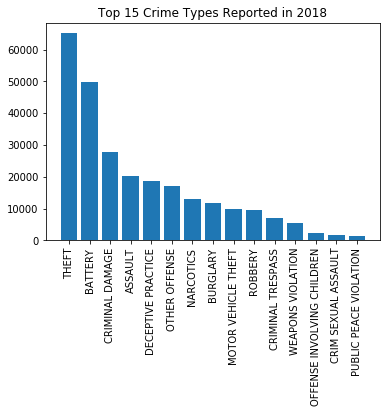

In [10]:
sorted_18 = crime_18.groupby('Primary Type').size().sort_values(ascending=False)[:15]
plt.bar(sorted_18.index, sorted_18.values)
plt.xticks(rotation=90)
plt.title('Top 15 Crime Types Reported in 2018')
plt.show()

In [11]:
sorted_18[:5] - sorted_17[:5]

Primary Type
THEFT                  736
BATTERY                567
CRIMINAL DAMAGE      -1236
ASSAULT               1074
DECEPTIVE PRACTICE    -292
dtype: int64

In [12]:
print('Total percent change in crime 2018 to 2017',
      round((crime_18.shape[0] - crime_17.shape[0])/crime_17.shape[0]*100,3))
difference = (crime_18.groupby('Community Area').size() - crime_17.groupby('Community Area').size()) / crime_17.groupby('Community Area').size()

print('10 areas with biggest increase in total crime: \n',
      difference.sort_values(ascending=False).head(10),
      '\n\n10 areas with biggest decrease in total crime: \n',
      difference.sort_values().head(10))

Total percent change in crime 2018 to 2017 -0.678
10 areas with biggest increase in total crime: 
 Community Area
0.0     1.000000
41.0    0.135731
7.0     0.115952
50.0    0.094804
56.0    0.080519
64.0    0.066890
10.0    0.060688
8.0     0.060515
26.0    0.054210
77.0    0.050057
dtype: float64 

10 areas with biggest decrease in total crime: 
 Community Area
59.0   -0.138783
24.0   -0.122898
63.0   -0.105377
12.0   -0.098540
42.0   -0.096615
52.0   -0.095316
45.0   -0.094310
31.0   -0.091775
61.0   -0.091281
1.0    -0.083655
dtype: float64


In [13]:
july_17 = crime['2017-07-01':'2017-07-26'].groupby('Primary Type').size()
july_18 = crime['2018-07-01':'2018-07-26'].groupby('Primary Type').size()

to_compare = ['BATTERY', 'ROBBERY', 'BURGLARY', 'MOTOR VEHICLE THEFT']

In [14]:
for item in to_compare:
    print(item,
          'changed:',
          round(100*(july_18.loc[item] - july_17[item])/july_17[item],3),
          'percent.')
print('Total change in crime:',
      round(100*(july_18.shape[0] - july_17.shape[0])/july_17.shape[0],3),
      'percent.')

BATTERY changed: 6.328 percent.
ROBBERY changed: -11.995 percent.
BURGLARY changed: -6.146 percent.
MOTOR VEHICLE THEFT changed: -13.869 percent.
Total change in crime: 3.448 percent.


Crime in Chicago had relatively little change from 2017 to 2018. While Theft and Battery crimes increased about 600 crimes each, relative to the scale these changes are insignificant and the total change in crime from 2017 to 2018 was essentially unchanged. Still there was geographic variation. Community Area 41 saw a 13% increase in crimes reported and Community Area 59 saw a 14% decrease in total crimes reported.

The statistics given by the candidate seem to be misleading based on the information I constructed. Albeit "our neighborhoods" may be some unknown subset of Chicago, for the city at large, Battery changed 6% not 136% and Motor Vehicle theft decreased 14%. While the specific time frame chosen seems largely comparable (same season and number of weekends), the language suggests that a month in 2018 is being compared to a week in 2017 which is unclear.

5 key findings:
- Crime is highly variable between Community Areas. From 2017 to 2018, one community area saw an increase in 13% in crime and another saw a 13% decrease.
- While the city at large sees more Theft crimes than any other, some community areas have Battery as the most commonly reported crime.
- Some 


Limitations:
The limitations of this analysis include geographic, temporal, and random variations in the available data. Crime is ultimately a local occurance and this analysis is unable to capture the variation which may be present within census tracts or across time periods. Additionally, this analysis was unable to include information on how areas are policed. Some crimes may only be reported if police are present and other crimes may not be reported at all if police are not policing a given area. This variation is important to understand crime in Chicago. 

In [28]:
#Problem 4. 2111 S. Michigan is in 33 (Near South Side). Uptown is 3. Garfield Park is 26 & 27.

#top ten crimes for Near South Side
#most likely is theft
result = crime.groupby('Community Area')['Primary Type'].value_counts()[33.0] / crime.groupby('Community Area')['Primary Type'].value_counts()[33.0].sum()
result[:10]

Primary Type
THEFT                  0.303086
BATTERY                0.155368
DECEPTIVE PRACTICE     0.148773
CRIMINAL DAMAGE        0.091005
OTHER OFFENSE          0.059615
ASSAULT                0.056977
MOTOR VEHICLE THEFT    0.042469
ROBBERY                0.037457
CRIMINAL TRESPASS      0.036402
BURGLARY               0.024532
Name: Primary Type, dtype: float64

In [29]:
#Thefts in Uptown
theft_df.groupby('Community Area').size()[3.0]

1954

In [30]:
#Thefts in East/West Garfield Park
theft_df.groupby('Community Area').size()[26.0] + theft_df.groupby('Community Area').size()[27.0]

2494

Part A
The most likely call is Theft for Near South Side.

Part B
Pr(Uptown | Theft) = 1954/129428
Pr(Garfield | Theft) = 2494/129428

Given the call is about Theft, it is more likely the call came from Garfield Park. The probabilities are relatively the same however, so it is not significantly more likely.

Part C
Pr(Garfield | Battery) = 100/260 
Pr(Uptown | Battery) = 160/260

Given the call is about Battery, it is about 60% more likely the call came from Uptown versus Garfield Park. 